# Kaggle Titanic Competition

Load packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Read data

In [3]:
df_train  = pd.read_csv('../raw_data/train.csv')
df_test   = pd.read_csv('../raw_data/test.csv')
df_submit = pd.read_csv('../raw_data/gender_submission.csv')

# select those who survived
df_survived = df_train[df_train['Survived'] == 1]

## Kaggle Titanic Tutorial
https://www.kaggle.com/alexisbcook/titanic-tutorial

In [30]:
# percentage of women who survived
women = df_train.loc[df_train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('percentage of women who survived:', round(rate_women*100, 2), '%')

percentage of women who survived: 74.2 %


In [31]:
# percentage of men who survived
men = df_train.loc[df_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('percentage of men who survived:', round(rate_men*100, 2), '%')

percentage of men who survived: 18.89 %


In [5]:
# random forest model
y = df_train['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : df_test.PassengerId, 'Survived': predictions})
output.to_csv('../clean_data/submission.csv', index =False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


End tutorial

## Data Analysis

### General

In [4]:
# number of rows and columns
df_train.shape

(891, 12)

In [5]:
# column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 5 first entries
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Missing values heatmap')

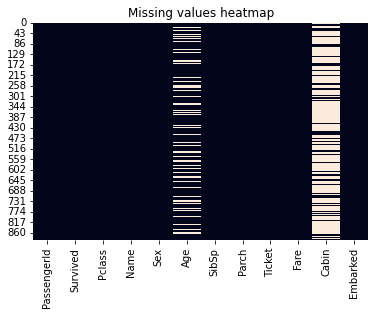

In [21]:
# missing values
sns.heatmap(df_train.isnull(), cbar = False).set_title("Missing values heatmap")

### Features

1. Survived

In [26]:
# percentage of surivors
perc_survivors = round((df_train['Survived'].sum()/df_train['PassengerId'].count()*100), 2)
print(perc_survivors, '% of registered passengers survived')

38.38 % of registered passengers survived


2. Embarked

In [27]:
# percentage embarked
perc_embarked = pd.DataFrame(np.array([['Cherbourg', round((df_train[df_train['Embarked'] == 'C'].shape[0]/df_train.shape[0]), 2)], 
                                       ['Queenstown', round((df_train[df_train['Embarked'] == 'Q'].shape[0]/df_train.shape[0]), 2)], 
                                       ['Southampton', round((df_train[df_train['Embarked'] == 'S'].shape[0]/df_train.shape[0]), 2)]]),
                             columns = ['Feature', 'Percentage'])

perc_embarked

,Feature,Percentage
0,Cherbourg,0.19
1,Queenstown,0.09
2,Southampton,0.72


3. Age

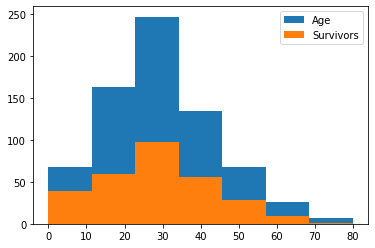

In [57]:
# number of bins
age_bins = np.linspace(0,80,8)

# age distribution and number of survivors per age group
age       = df_train['Age']
survivors = df_survived['Age']

# histogram with age distribution and survivors
plt.hist(age, age_bins, label = 'Age')
plt.hist(survivors, age_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

4. Pclass

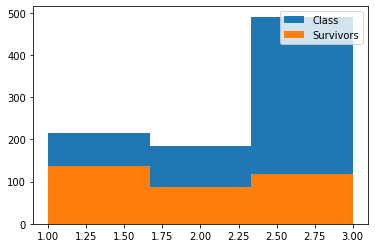

In [58]:
# number of bins
class_bins = 3

# class distribution and number of survivors per class
pclass    = df_train['Pclass']
survivors = df_survived['Pclass']

# histogram with class distribution and survivors
plt.hist(pclass, bins = class_bins, label = 'Class')
plt.hist(survivors, bins = class_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

5. Sex

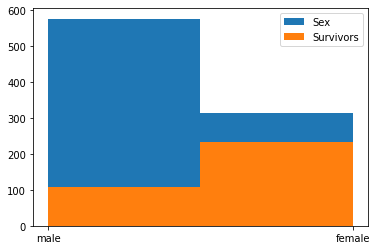

In [6]:
# number of bins
sex_bins = 2

# sex distribution and number of survivors per sex
sex       = df_train['Sex']
survivors = df_survived['Sex']

# histogram with sex distribution and survivors
plt.hist(sex, bins = sex_bins, label = 'Sex')
plt.hist(survivors, bins = sex_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

6. Fare

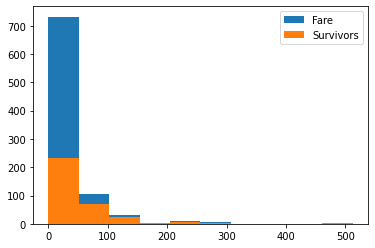

In [7]:
# number of bins
fare_bins = 10

# fare distribution and number of survivors per fare
fare      = df_train['Fare']
survivors = df_survived['Fare']

# histogram with fare distribution and survivors
plt.hist(fare, bins = fare_bins, label = 'Fare')
plt.hist(survivors, bins = fare_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

7. SibSp

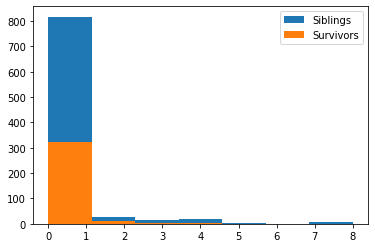

In [17]:
# number of bins
sibsp_bins = np.linspace(0, 8, 8)

# sibsp distribution and number of survivors per fare
sibsp     = df_train['SibSp']
survivors = df_survived['SibSp']

# histogram with sibsp distribution and survivors
plt.hist(sibsp, bins = sibsp_bins, label = 'Siblings')
plt.hist(survivors, bins = sibsp_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

8. Parch

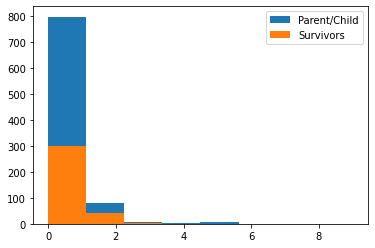

In [19]:
# number of bins
parch_bins = np.linspace(0, 9, 9)

# sibsp distribution and number of survivors per fare
parch     = df_train['Parch']
survivors = df_survived['Parch']

# histogram with sibsp distribution and survivors
plt.hist(parch, bins = parch_bins, label = 'Parent/Child')
plt.hist(survivors, bins = parch_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

### Correlation

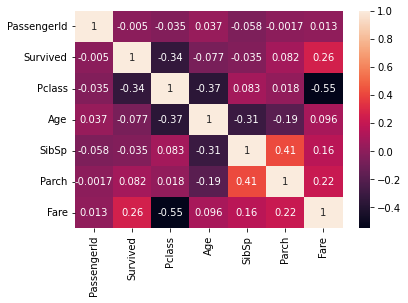

In [11]:
corr_matrix = df_train.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Linear Regression - Fare

In [5]:
# prepare data
x_train, x_valid, y_train, y_valid = train_test_split(np.array(df_train['Fare']).reshape((-1, 1)), np.array(df_train['Survived']), test_size = 0.2, random_state=7)

# define model
model = LinearRegression().fit(x_train, y_train)

In [6]:
# return R-squared
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

# intercept
print('intercept:', model.intercept_)

# slope
print('slope:', model.coef_)

coefficient of determination: 0.05611220478430612
intercept: 0.31087639332971057
slope: [0.00218963]


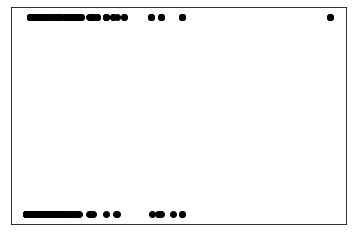

In [8]:
# Plot outputs
plt.scatter(x_train, y_train, color="black")
# plt.plot(x_train, y_train, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# statistical significance
model.conf_int()

AttributeError: 'LinearRegression' object has no attribute 'conf_int'

In [6]:
y_pred = model.predict(x_valid)
y_pred

array([0.3298441 , 0.33605719, 0.32822925, 0.34481572, 0.48157656,
       0.33934164, 0.32784606, 0.31087639, 0.34043646, 0.49296266,
       0.36780688, 0.46316546, 0.36123798, 0.36835429, 0.32850295,
       0.32781869, 0.3267057 , 0.31087639, 0.34240713, 0.33934164,
       0.47888528, 0.3298441 , 0.37656542, 0.33549161, 0.32850295,
       0.34569158, 0.36780688, 0.32850295, 0.33934164, 0.60352102,
       0.37163875, 0.36780688, 0.32784606, 0.36780688, 0.43458153,
       0.3266965 , 0.57363251, 0.3279008 , 0.37935721, 0.36780688,
       0.32499953, 0.33525425, 0.32850295, 0.34262609, 0.32675124,
       0.41357024, 0.37196719, 0.32850295, 0.34043646, 0.3266965 ,
       0.3267057 , 0.36780688, 0.55367027, 0.33934164, 0.31087639,
       0.34612951, 0.37935721, 0.32850295, 0.43458153, 0.33390412,
       0.48604714, 0.33934164, 0.32801948, 0.37766024, 0.3279008 ,
       0.33167792, 0.33386755, 0.32784606, 0.3298441 , 0.85285643,
       0.50598201, 0.31087639, 0.46316546, 0.4908004 , 0.31087